In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.modeling import models, fitting

### Loading the galaxy spectra data which is an ascii file

In [2]:
data = ascii.read('../comb05.spec')
lamda = data['col1']                     # wavelength
spectra = data['col2']                   # flux
variance_spectra = data['col3']          # variance on flux

### Below is the list of emission lines (in terms of wavelength) we would like to fit with a Gaussian distribution. The tuples contains start and end value of the wavelength range for thses emission lines.

In [3]:
emission_lines = [(5884.04, 5902.79), (6292.79, 6305.29), (6856.54, 6869.04), (7232.79, 7250.29),
                  (7270.29, 7281.54), (7335.29, 7349.04), (7519.04, 7540.29), (7706.54, 7732.79),
                (7742.79, 7756.54), (7816.54, 7834.04), (7902.79, 7926.54)]

In [4]:
# empty list to contain data of these emission lines 
data_emission = []           
lamda_emission = []

### Collecting the variance on spectra data for specific range of wavelengths of the emission lines to fit with Gaussian distribution.

In [5]:
lam_list = lamda.tolist()                   # converting array to list
var_spec_list = variance_spectra.tolist()   # contains variance on spectra data

for i,p in enumerate(emission_lines):
    start = lam_list.index(p[0])
    stop  = lam_list.index(p[1])
    var_spec = var_spec_list[start:stop+1]   # slicing and collecting data for the wavelength range
    lam = lam_list[start:stop+1]
    data_emission.append(var_spec)
    lamda_emission.append(lam)

### Here is the plot of emission lines we are going to fit

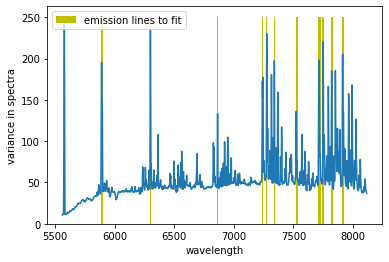

In [6]:
s=np.zeros(len(lamda_emission))
w= np.zeros(len(lamda_emission))
for i,p in enumerate(lamda_emission):
    s[i]= np.median(p)
    w[i]= len(p)

plt.plot(lamda, variance_spectra)
plt.bar(s, height=max(variance_spectra), width=w, color='y', label='emission lines to fit')
plt.xlabel('wavelength')
plt.ylabel('variance in spectra')
plt.legend()
plt.show()

In [7]:
model_gauss = models.Gaussian1D()           # calling the Gaussian model 
fitter_gauss = fitting.LevMarLSQFitter()    # Calling the fitting scheme 

###  Here we are going to fit each emission line data individually. Before fit we shift both the x and y axis of the data. The y axis has been shifted by subtracting the minimum value of the data array so that it touch the x axis. And the x axis has been shifted by the median value of the data array.

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    134.05321375775554 -1.651334115550181 4.2443147371163175


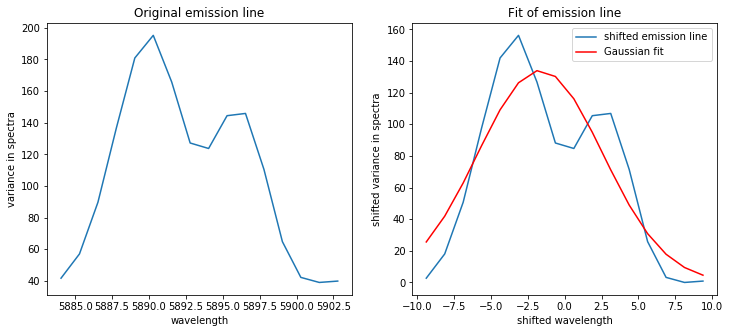

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    191.91528218423994 1.1737032324541385 1.8502429712090838


<Figure size 432x288 with 0 Axes>

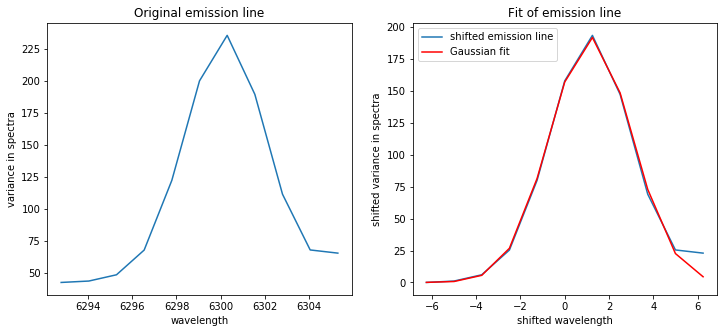

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ------------------ ------------------
    90.86176937357266 1.0483609392273496 1.5666673602851475


<Figure size 432x288 with 0 Axes>

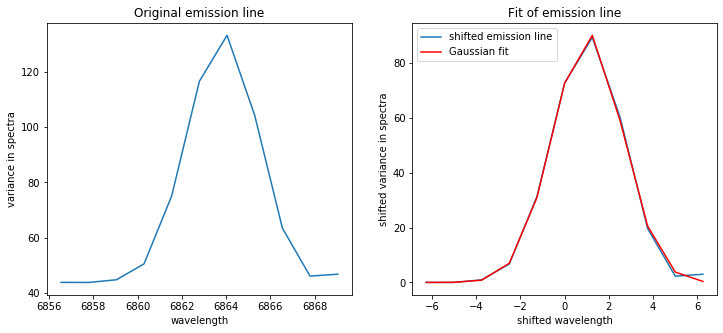

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev     
    ----------------- ------------------ -----------------
    128.3896648226689 1.1183972587404154 3.704789944503584


<Figure size 432x288 with 0 Axes>

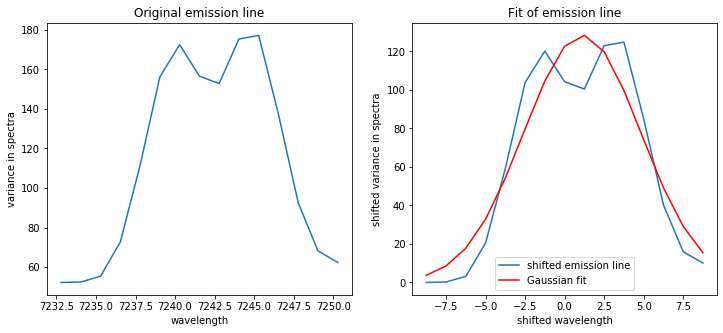

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean             stddev      
    ------------------ ----------------- ------------------
    176.67222766135257 0.355748919614733 1.7353114359662436


<Figure size 432x288 with 0 Axes>

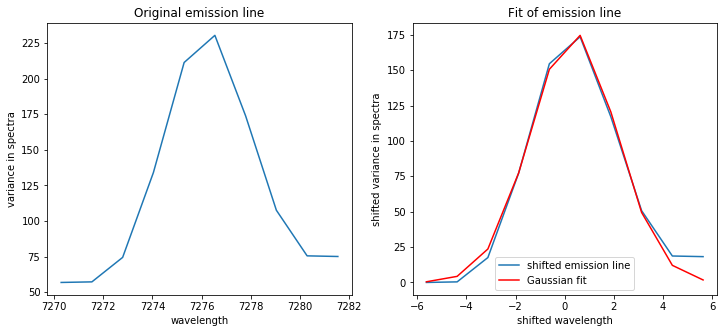

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev     
    ------------------ ------------------- -----------------
    152.10950635937476 -1.2902305748021052 1.761638113689293


<Figure size 432x288 with 0 Axes>

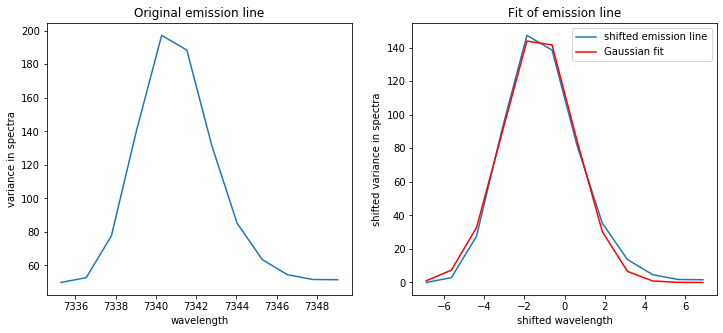

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev     
    ----------------- ------------------ -----------------
    79.12648572483118 -5.591629177124695 2.179458646614257


<Figure size 432x288 with 0 Axes>

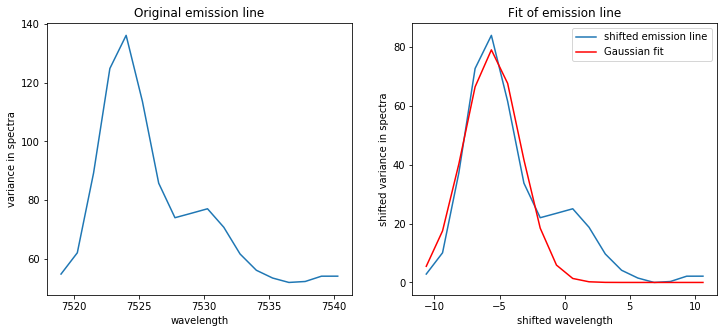

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ------------------ ------------------
    143.7371450920256 -4.100043193133005 3.8064581953129544


<Figure size 432x288 with 0 Axes>

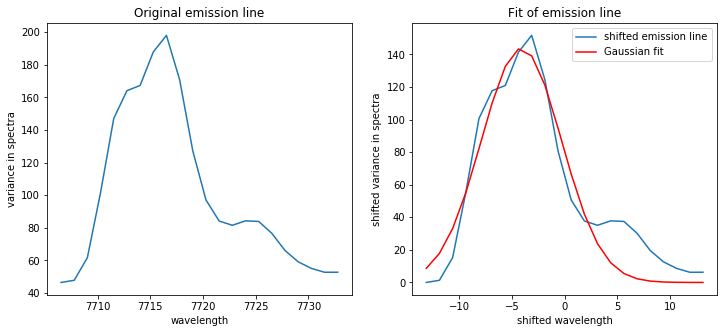

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev     
    ----------------- ------------------ -----------------
    164.5726891836564 0.9696635321817682 2.102606178669196


<Figure size 432x288 with 0 Axes>

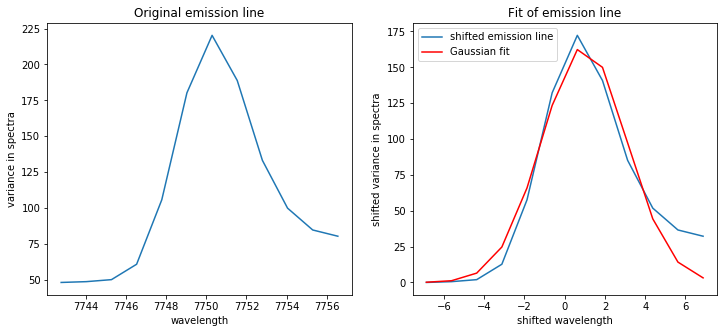

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    136.18337487137413 -3.722311651646327 2.1817311239713346


<Figure size 432x288 with 0 Axes>

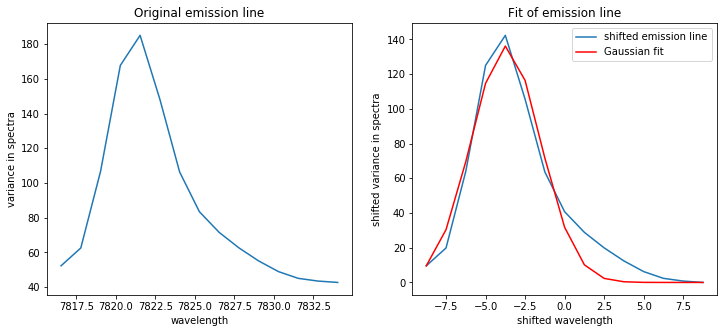

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev     
    ------------------ ------------------ -----------------
    119.80279004393687 0.9669081643212488 4.526844653081516


<Figure size 432x288 with 0 Axes>

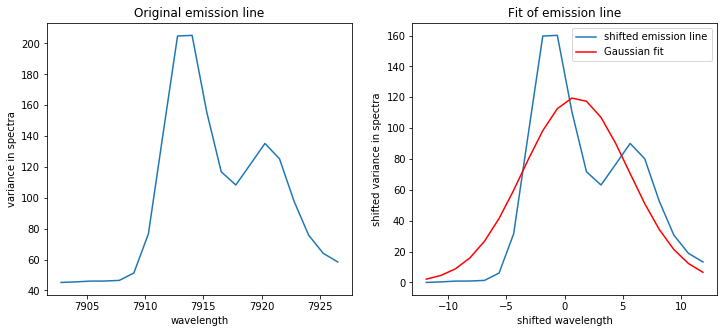

<Figure size 432x288 with 0 Axes>

In [8]:
best_fit = []
for i,p in enumerate(data_emission):
    x= lamda_emission[i] - np.median(lamda_emission[i])
    y= data_emission[i] - np.min(data_emission[i])
    
    best_fit_gauss = fitter_gauss(model_gauss, x, y)
    best_fit.append(best_fit_gauss)
    
    print(best_fit_gauss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(lamda_emission[i], data_emission[i])
    ax1.set_title('Original emission line')
    ax1.set_xlabel('wavelength')
    ax1.set_ylabel('variance in spectra')
    
     
    ax2.plot(x, y, label='shifted emission line') 
    ax2.plot(x, best_fit_gauss(x), 'r', label='Gaussian fit')
    ax2.set_title('Fit of emission line')
    ax2.set_xlabel('shifted wavelength')
    ax2.set_ylabel('shifted variance in spectra')
    plt.legend()
    plt.show()
    plt.figure()